In [186]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [187]:
import sklearn.linear_model as LogisticRegression

In [188]:
titanic=sns.load_dataset('titanic')

In [189]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [190]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [191]:
 titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

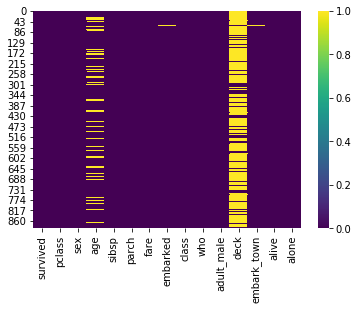

In [192]:
sns.heatmap(titanic.isnull(),cmap='viridis')

In [193]:
titanic['age'].isnull().sum()/titanic.shape[0]*100

19.865319865319865

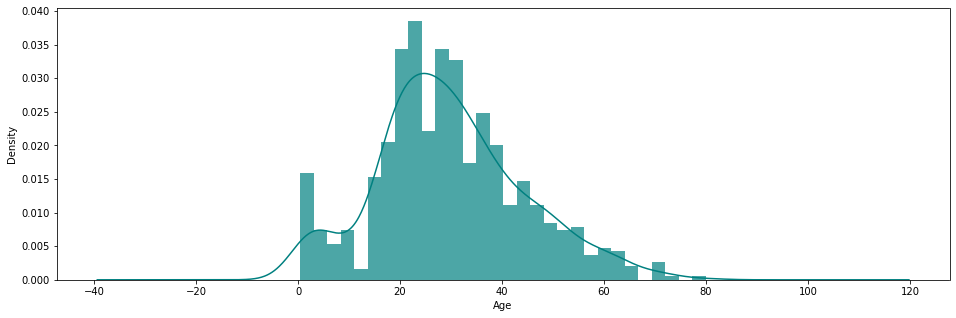

In [194]:
ax=titanic['age'].hist(bins=30,density=True,stacked=True, color='teal',alpha=0.7,figsize=(16,5))
titanic['age'].plot(kind='density', color='teal')
ax.set_xlabel('Age')
plt.show()

Text(0.5, 1.0, 'Male')

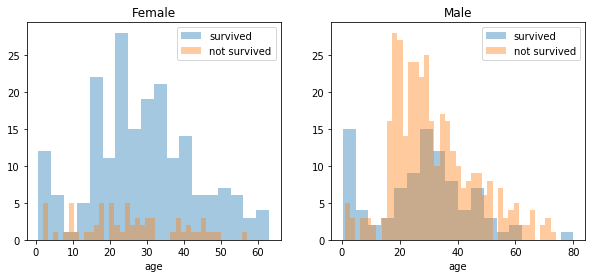

In [195]:
survived='survived'
not_survived='not survived'

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,4))
women=titanic[titanic['sex']=='female']
men=titanic[titanic['sex']=='male']

ax=sns.distplot(women[women[survived]==1].age.dropna(), bins=18, label= survived, ax=axes[0],kde=False)
ax=sns.distplot(women[women[survived]==0].age.dropna(), bins=40, label= not_survived, ax=axes[0],kde=False)
ax.legend()
ax.set_title('Female')

ax=sns.distplot(men[men[survived]==1].age.dropna(), bins=18, label= survived, ax=axes[1],kde=False)
ax=sns.distplot(men[men[survived]==0].age.dropna(), bins=40, label= not_survived, ax=axes[1],kde=False)
ax.legend()
ax.set_title('Male')


In [196]:
titanic['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

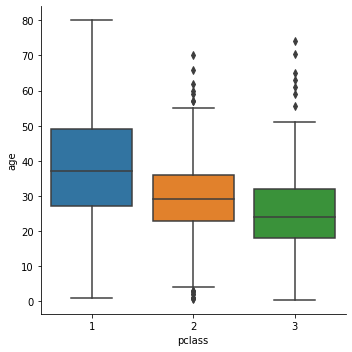

In [197]:
sns.catplot(x='pclass', y='age', data=titanic, kind='box')

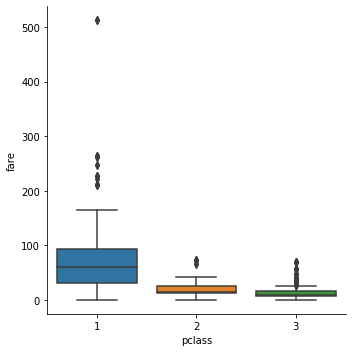

In [198]:
sns.catplot(x='pclass', y='fare',  data=titanic , kind='box')

In [199]:
titanic[titanic['pclass']==1]['age'].mean()

38.233440860215055

In [200]:
titanic[titanic['pclass']==2]['age'].mean()

29.87763005780347

In [201]:
titanic[titanic['pclass']==3]['age'].mean()

25.14061971830986

In [202]:
def impute_age(cols):
    age=cols[0]
    pclass=cols[1]
    
    if pd.isnull(age):
        if pclass==1:
            return titanic[titanic['pclass']==1]['age'].mean()
        elif pclass==2:
            return titanic[titanic['pclass']==2]['age'].mean()
        elif pclass==3:
            return titanic[titanic['pclass']==3]['age'].mean()
    else:
        return age

In [203]:
titanic['age']=titanic[['age','pclass']].apply(impute_age,axis=1)

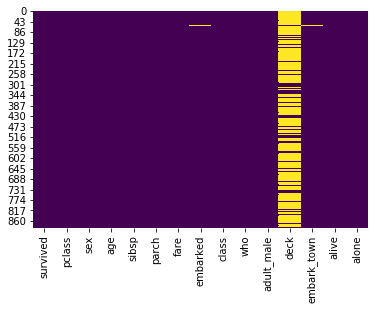

In [204]:
sns.heatmap(titanic.isnull(),cbar=False, cmap='viridis')

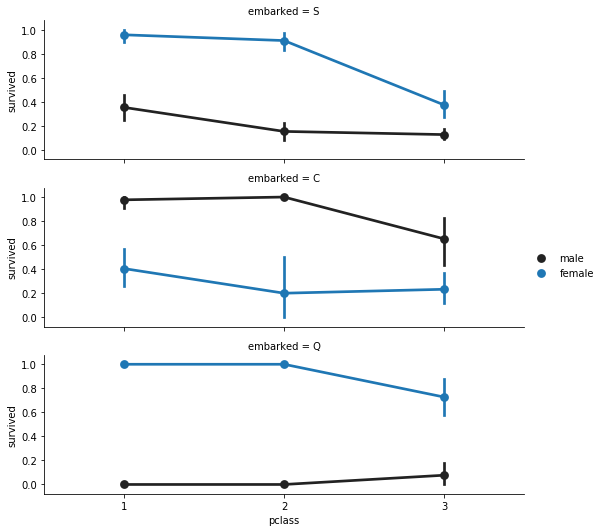

In [205]:
f=sns.FacetGrid(titanic,row='embarked', height=2.5, aspect=3)
f.map(sns.pointplot, 'pclass' , 'survived','sex' , order=None, hue_order= None)
f.add_legend()

In [206]:
titanic['embarked'].isnull().sum()

2

In [207]:
common_value='S'
titanic['embarked'].fillna(common_value,inplace=True)

In [208]:
titanic['embarked'].isnull().sum()

0

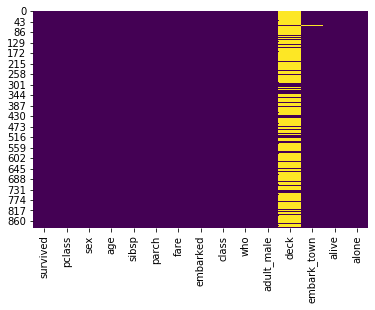

In [209]:
sns.heatmap(titanic.isnull(),cbar=False, cmap='viridis')

In [210]:
titanic.drop(labels=['deck', 'embark_town','alive'], inplace=True , axis=1)

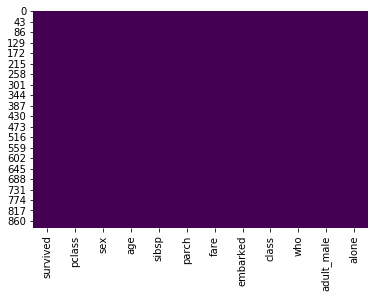

In [211]:
sns.heatmap(titanic.isnull(), cbar=False, cmap='viridis')

In [212]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    object  
 3   age         891 non-null    float64 
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   embarked    891 non-null    object  
 8   class       891 non-null    category
 9   who         891 non-null    object  
 10  adult_male  891 non-null    bool    
 11  alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(3)
memory usage: 65.5+ KB


In [213]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,True


In [214]:
titanic['fare']=titanic['fare'].astype('int')
titanic['age']=titanic['age'].astype('int')
titanic['pclass']=titanic['pclass'].astype('int')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int32   
 2   sex         891 non-null    object  
 3   age         891 non-null    int32   
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    int32   
 7   embarked    891 non-null    object  
 8   class       891 non-null    category
 9   who         891 non-null    object  
 10  adult_male  891 non-null    bool    
 11  alone       891 non-null    bool    
dtypes: bool(2), category(1), int32(3), int64(3), object(3)
memory usage: 55.0+ KB


In [215]:
genders={'male': 0, 'female': 1}
titanic['sex']=titanic['sex'].map(genders)

In [216]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,0,22,1,0,7,S,Third,man,True,False
1,1,1,1,38,1,0,71,C,First,woman,False,False
2,1,3,1,26,0,0,7,S,Third,woman,False,True
3,1,1,1,35,1,0,53,S,First,woman,False,False
4,0,3,0,35,0,0,8,S,Third,man,True,True


In [217]:
wh={'man':0, 'woman':1, 'child':2}
titanic['who']=titanic['who'].map(wh)

In [218]:
adult_male={True:1, False:0}
titanic['adult_male']=titanic['adult_male'].map(adult_male)

In [219]:
alone={True:1, False:0}
titanic['alone']=titanic['alone'].map(alone)

In [220]:
ports={'S':0 , 'C': 1, 'Q':2}
titanic['embarked']=titanic['embarked'].map(ports)

In [221]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,0,22,1,0,7,0,Third,0,1,0
1,1,1,1,38,1,0,71,1,First,1,0,0
2,1,3,1,26,0,0,7,0,Third,1,0,1
3,1,1,1,35,1,0,53,0,First,1,0,0
4,0,3,0,35,0,0,8,0,Third,0,1,1


In [222]:
titanic.drop(['class'],axis=1, inplace=True)

In [223]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone
0,0,3,0,22,1,0,7,0,0,1,0
1,1,1,1,38,1,0,71,1,1,0,0
2,1,3,1,26,0,0,7,0,1,0,1
3,1,1,1,35,1,0,53,0,1,0,0
4,0,3,0,35,0,0,8,0,0,1,1


In [224]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [225]:
X=titanic.drop('survived', axis=1)
y=titanic['survived']

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)

In [226]:
X_train.shape

(712, 10)

In [233]:

mod=LogisticRegression.LogisticRegression(solver='lbfgs', max_iter=400)
mod.fit(X_train,y_train)
y_predict=mod.predict(X_test)

In [234]:
mod.score(X_test,y_test)

0.8156424581005587